# Practical Work - Convolutional neural network (CNN)

## Introduction

Main goal: construction of a simple convolutional neural network with Keras.
Many possibilities for improvement:
- optimization of the number of layers / kernel / activations;
- architecture;
- regularization;
- ...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as tk

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Activation,Lambda,Flatten,Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## MNIST dataset loading
The MNIST data is loaded. The parameters of the database are retrieved.

In [3]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Number of samples in the training dataset
num_examples = x_train.shape[0] 
# Number of samples in the test dataset
num_test = x_test.shape[0]
# Size of the input layer (retina) = number of pixels of the MNIST images (784 pixels)
num_input = x_train.shape[1]*x_train.shape[2]
# Number of classes ( the 10 digits : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})
num_classes = 10

# Width ( and height) of the images
img_size = x_train.shape[1] 
# Size of (square) image
img_shape = (img_size, img_size)

# Reshape of datatsets in array (<=> tensor with 4 dimensions) and normalization
x_train = x_train.reshape(num_examples, img_size, img_size, 1)/255
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 1)/255

# Print
print('Size of the retina : ',num_input)
print("Number of samples  : ",num_examples)

# Converts the label arrays (integers) to binary class matrix.
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
Size of the retina :  784
Number of samples  :  60000


## Model
### Global parameters

In [4]:
# Learning rate
lr = 0.001
# Number of epochs 
num_epochs = 25
# Batch size
batch_size = 128
# Dropout regularization ( here the probability of keeping the neuron)
dropout = 0.75

### Definition of the architecture

**CONV1-RELU-MAX POOLING - CONV2-RELU-MAX POOLING - FCL-DROPOUT-Prediction**

- Sequential model : [Sequential groups a linear stack of layers](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential);
- CONV : [2D convolution layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D);
- MAX POOLING : [Max pooling operation for 2D spatial data.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D);
- Flatten : [Flattens the input. Does not affect the batch size.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten);
- FCL  : [Fully-connected layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense);
- DROPOUT : [Applies Dropout to the input.](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

Remarks: 
- the size of the convolution kernels is (5x5);
- the max pooling operation works on a (2x2) region.

In [5]:
# TODO: Create a CNN
conv_edge = 3
pool_edge = 2
conv = (conv_edge,conv_edge)
pool = (pool_edge,pool_edge)
strides = 2
input_shape = (batch_size,img_size,img_size,1) #only 1 channel NO RGB

model = Sequential()
model.add(Conv2D(
    32, kernel_size=conv, activation="relu", padding="same", name="conv1",input_shape=input_shape[1:]
))
model.add(MaxPooling2D(
    pool_size=pool, strides=strides, name="pool1"
))
model.add(Conv2D(
    64, kernel_size=conv, activation="relu",  padding = "valid", name="conv2"
))
model.add(MaxPooling2D(
    pool_size=pool, strides=strides, name="pool2"
))
model.add(Flatten(
    name="flatten"
))
model.add(Dense(
    1024,activation="relu", name="dense1"
))
model.add(Dropout(
    dropout
))
model.add(Dense(
    num_classes, activation="softmax",name="output"
))


# Print a summary of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 12, 12, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense1 (Dense)               (None, 1024)              2360320   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

## Loss function and optimization
- Loss function : [cross-entropy loss between labels and predictions](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy);
- Optimizer: [Adam version of gradient descent algorithm](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).

In [6]:
#TODO: define the loss function and the optimizer

adam = Adam (learning_rate=lr)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['acc'])

## Training phase
- [train the model for a fixed number of epochs (iterations on a dataset).](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) with the training dataset </code>(x_train, y_train)</code> and a batch stategy;
- validation with the test dataset </code>(x_test, y_test)</code>.

In [7]:
# TODO: train the model

hist = model.fit(x=x_train, y=y_train, epochs=num_epochs, batch_size=batch_size, verbose=1, validation_data=(x_test,y_test))

Epoch 1/25
469/469 [==============================] - 36s 7ms/step - loss: 0.4650 - acc: 0.8519 - val_loss: 0.0449 - val_acc: 0.9855
Epoch 2/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0693 - acc: 0.9786 - val_loss: 0.0319 - val_acc: 0.9897
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0499 - acc: 0.9843 - val_loss: 0.0308 - val_acc: 0.9892
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0421 - acc: 0.9868 - val_loss: 0.0242 - val_acc: 0.9919
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0359 - acc: 0.9891 - val_loss: 0.0222 - val_acc: 0.9922
Epoch 6/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0310 - acc: 0.9903 - val_loss: 0.0206 - val_acc: 0.9929
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0210 - acc: 0.9929 - val_loss: 0.0201 - val_acc: 0.9934
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0

## Loss value & metrics values with the test dataset
[Compute the loss value & metrics values for the model in test mode.](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)


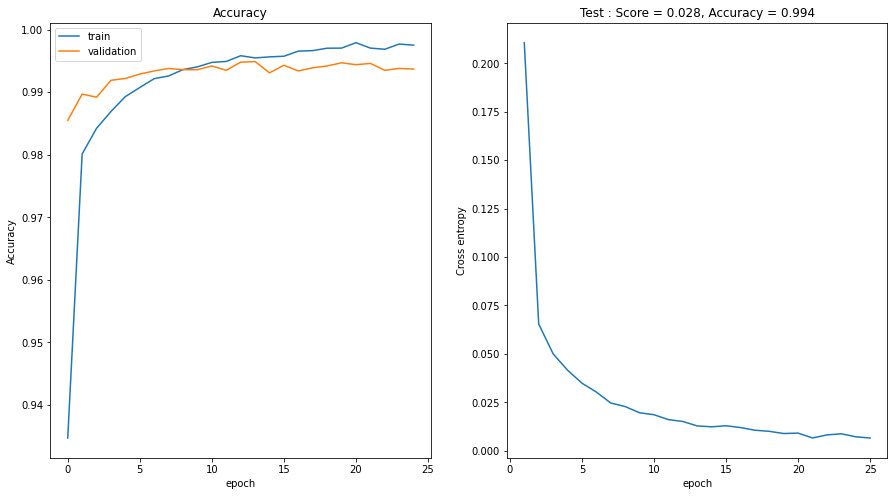

<Figure size 432x288 with 0 Axes>

In [8]:
# Compute the metrics in test mode
score = model.evaluate(x_test, y_test, verbose=0)

# Print the results
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

plt.subplot(1,2,2)
x = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('Cross entropy')
plt.title("Test : Score = {0:5.3f}, Accuracy = {1:5.3f}".format(score[0], score[1]))
plt.plot(x,l)
plt.show()
plt.tight_layout()

## Display the incorrect classifications

Number of errors 63/10000




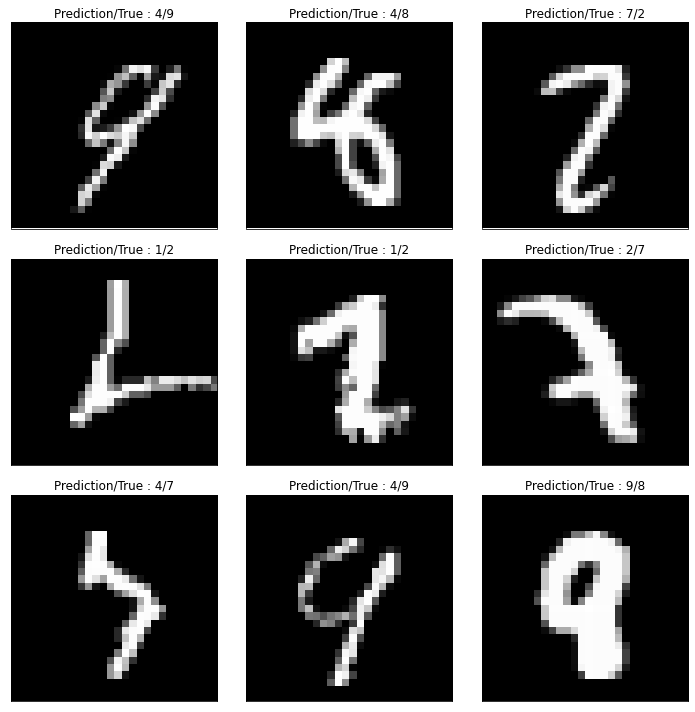

In [9]:
predicted_classes = np.argmax(model.predict(x_test), axis=-1)
y = np.argmax(y_test,axis=1)

incorrects = np.nonzero(predicted_classes != y)[0]
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrects[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title( "Prediction/True : {}/{}".format(predicted_classes[incorrects[i]], y[incorrects[i]]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
print("Number of errors {}/{}\n\n".format(incorrects.size,y.size))


In [10]:
import json

data = model.to_json()
with open('/content/drive/MyDrive/Colab-Notebooks/Deep-Learning-Python/02-convolutional/model.json', 'w') as outfile:
    json.dump(data, outfile)
print("Model was saved in the GDrive in format .json!")
print(data)

Model was saved in the GDrive in format .json!
{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv1_input"}}, {"class_name": "Conv2D", "config": {"name": "conv1", "trainable": true, "batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "pool1", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "paddi

In [11]:
model.save_weights("/content/drive/MyDrive/Colab-Notebooks/Deep-Learning-Python/02-convolutional/model.h5")
print("Weights were saved in the GDrive in format .h5!")

Weights were saved in the GDrive in format .h5!


In [12]:
import tensorflow as tf
print(tf.__version__)  # This notebook runs on TensorFlow 1.15.x or earlier

model.save('/content/drive/MyDrive/Colab-Notebooks/Deep-Learning-Python/02-convolutional/model')

2.4.1
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab-Notebooks/Deep-Learning-Python/02-convolutional/model/assets
